<h1>Описание проекта</h1>

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.
Наша задача: Приоритизировать гипотезы, запустить A/B-тест и проанализировать его результаты.

<h2>Часть 1. Приоритизация гипотез.</h2>

<strong>Задача</strong>

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
<ul>
<li>Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</li>
<li>Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</li>
<li>Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.</li>
</ul>

<strong>Описание данных</strong>

<ul>
<li>Hypothesis — краткое описание гипотезы;</li>
<li>Reach  — охват пользователей по 10-балльной шкале;</li>
<li>Impact — влияние на пользователей по 10-балльной шкале;</li>
<li>Confidence — уверенность в гипотезе по 10-балльной шкале;</li>
<li>Efforts  —  затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.</li>
</ul>

In [107]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [108]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [109]:
pd.set_option('display.max_colwidth', None)
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [110]:
data.columns = data.columns.str.lower()

Считаем ICE

In [111]:
data['ICE'] = round(data['impact']*data['confidence']/data['efforts'],2)

print(data[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Считаем RICE

In [112]:
data['RICE'] = round(data['reach']*data['impact']*data['confidence']/data['efforts'],2)

print(data[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

При применении фреймворка 'ICE' лидерами стали 8, 0, 7 гипотезы. Наименее приоритетными оказались 5 и 4.
При применении фреймворка 'RICE' лидеры поменялись на 7, 2 и 0. Гипотезе 2 удалось стать приоритетнее, потому что у нее высокий показатель reach, который домножился в начале формулы. Гипотеза 8 стала менее приоритетной как раз из-за того, что у нее показтель reach равен 1, что при умножении не дает никакого результата. Наименее приоритетная гипотеза 4 осталась в самом низу, так как все остальные ее показатели равны равны 1.

<h2>Часть 2. Анализ A/B-теста.</h2>

<strong>Задача</strong>

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируйте A/B-тест:
<ol>
<li>Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.</li>
<li>Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.</li>
<li>Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.</li>
<li>Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.</li>
<li>Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.</li>
    <li>Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.</li>
    <li>Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.</li>
    <li>Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.</li>
    <li>Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</li>
    <li>Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.</li>
    <li>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.</li>
    <li>Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.</li>
    <li>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.</li>
    <li>Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.</li>
</ol>

In [113]:
orders = pd.read_csv('/datasets/orders.csv')

In [114]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [115]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [116]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [117]:
print(f'Кол-во дубликатов: {orders.duplicated().sum()}')

Кол-во дубликатов: 0


In [118]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [119]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [120]:
print(f'Кол-во дубликатов: {visitors.duplicated().sum()}')

Кол-во дубликатов: 0


Все данные в порядке за исключением типа даты. Преобразуем его.

In [121]:
orders['date'] = pd.to_datetime(orders['date'])

In [122]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим, есть ли пользователи, которые одновременно попали в группу 'A' и в 'B'

In [123]:
duplicates_visits = pd.Series(list(set(orders.query('group == "A"')['visitorId']).intersection(set(orders.query('group == "B"')['visitorId']))))
duplicates_visits.values

array([3957174400, 3984495233, 2780786433, 1294878855, 1648269707,
       1614305549, 4120364173,  232979603,  199603092, 4266935830,
       2712142231, 2587333274, 2716752286, 3891541246, 1668030113,
       2654030115, 3234906277, 1230306981, 1404934699, 3803269165,
       2949041841,  237748145,  457167155, 2927087541, 1738359350,
       3062433592, 3656415546,  818047933,  393266494,  963407295,
        471551937, 2579882178, 3202540741, 2686716486, 1333886533,
       2044997962, 3941795274, 1801183820, 2378935119, 4256040402,
       4069496402, 3766097110,    8300375,  351125977, 1602967004,
        276558944, 2038680547, 3951559397, 3963646447, 4186807279,
       3717692402, 1959144690, 2458001652, 2600415354, 2954449915,
       1316129916,  477780734, 3972127743])

In [124]:
#Создадим переменную в виде массива с данными, которые пересекаются
duplicates_list = list(duplicates_visits.values)

In [125]:
#Перезапишем датафрейм, но уже без данных значений
orders = orders.query('visitorId != @duplicates_list')

Проверим, есть ли пересечения теперь

In [126]:
duplicates_visits2 = pd.Series(list(set(orders.query('group == "A"')['visitorId']).intersection(set(orders.query('group == "B"')['visitorId']))))
duplicates_visits2.values

/tmp/ipykernel_64/1964881769.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  duplicates_visits2 = pd.Series(list(set(orders.query('group == "A"')['visitorId']).intersection(set(orders.query('group == "B"')['visitorId']))))


array([], dtype=float64)

Не смотря на ошибку, мы видим, что список пустой, а это значит нам удалось удалить пересекающихся пользователей

<strong>1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.</strong>

Для этого нам необходимо сделать из наших датафреймов кумулятивные таблицы с накоплением.

In [127]:
datesGroups = orders[['date','group']].drop_duplicates()

In [128]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max',
      'group' : 'max',
      'transactionId' : 'nunique',
      'visitorId' : 'nunique',
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])


cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [129]:
print(f'Кол-во дубликатов: {cumulativeData.duplicated().sum()}')

Кол-во дубликатов: 0


In [130]:
print('Кол-во пропусков: ')
pd.DataFrame(round(cumulativeData.isna().mean()*100,)).style.background_gradient('coolwarm')

Кол-во пропусков: 


,0
date,0.000000
group,0.000000
orders,0.000000
buyers,0.000000
revenue,0.000000
visitors,0.000000


In [131]:
print('Групп в тестировании 2')
print(orders['group'].unique())

Групп в тестировании 2
['B' 'A']


In [132]:
print('Дата начала тестирования:')
print(cumulativeData['date'].min())

print('Дата окончания тестирования:')
print(cumulativeData['date'].max())

Дата начала тестирования:
2019-08-01 00:00:00
Дата окончания тестирования:
2019-08-31 00:00:00


Тестирование у нас проходит 31 день.

In [133]:
orders.groupby('group').agg({'visitorId': 'nunique'})

,visitorId
group,
A,445
B,528


В группе 'B' у нас 528 пользователей, а в группе 'А' 445.

Text(0, 0.5, 'Выручка')

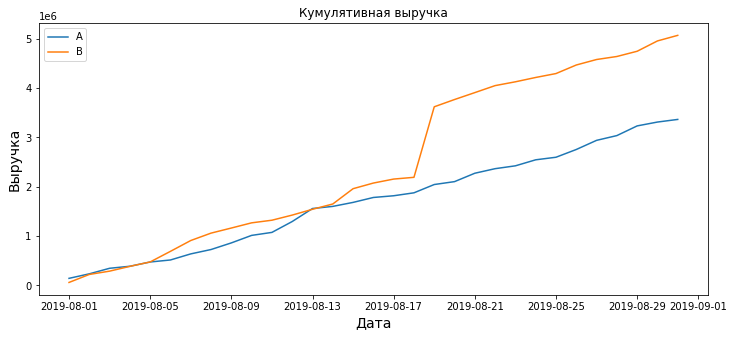

In [134]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("Кумулятивная выручка")
plt.legend()
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)


Сегмент 'B' опережал сегмент 'А' почти на протяжении всего тестирования. В середине теста  выручка группы 'B' резко возосла. Это может быть связанно с аномальным ростом среднего чека либо среднегокол-ва заказов.  

<strong>2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.</strong>

Text(0, 0.5, 'Сумма среднего чека')

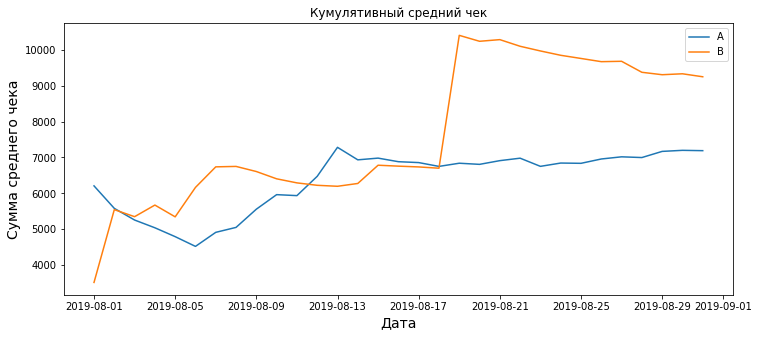

In [135]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("Кумулятивный средний чек")
plt.legend()
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Сумма среднего чека', fontsize=14)

Ближе к середине тестирования сегменту 'А' удалось опередить сегмент 'В', но далее мы видим резкий рост среднего чека. Это может быть связанно с аномальными значениями в сегменте 'B'.

<strong>3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.</strong>

Text(0, 0.5, 'Изменение соотношения среднего чека')

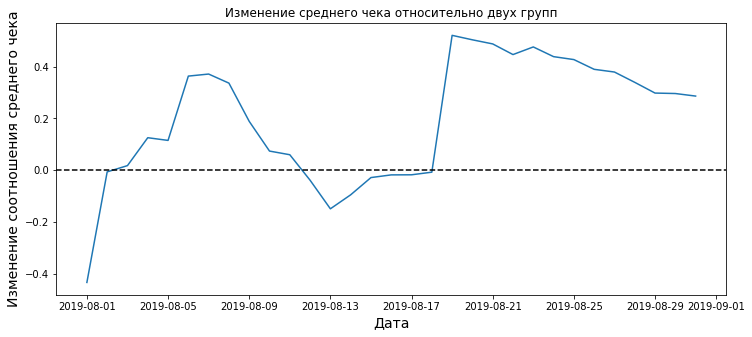

In [136]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title("Изменение среднего чека относительно двух групп")
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Изменение соотношения среднего чека', fontsize=14)

Видим, что результаты теста значитель поменялись в середине тестирования.

<strong>4 Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.</strong>

Text(0, 0.5, 'Чило заказов')

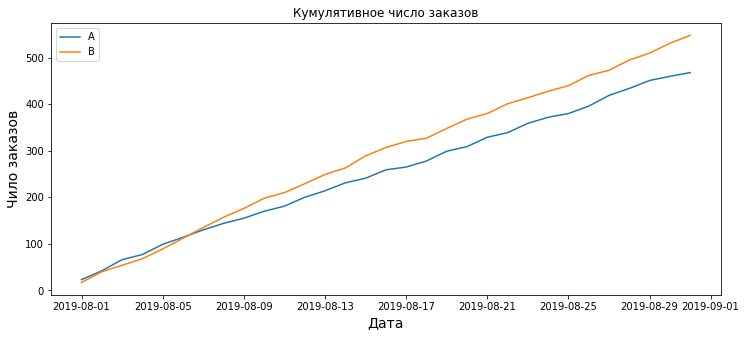

In [137]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='B')
plt.title("Кумулятивное число заказов")
plt.legend()
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Чило заказов', fontsize=14)

Теперь мы еще раз убедились, что аномальный рост выручки связан с изменением среднего чека в сегменте 'B'

<strong>5 Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.</strong>

Text(0, 0.5, 'Изменение соотношения закзазов')

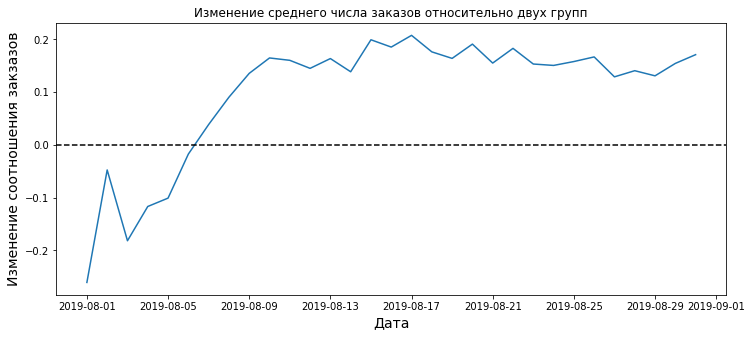

In [138]:
# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['ordersA'])-1)
plt.title("Изменение среднего числа заказов относительно двух групп")
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Изменение соотношения закзазов', fontsize=14)

Сначла заказов в сегменте 'В' было меньше чем в 'А', но потом группа 'В' вырвалась вперед.

<strong>6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.</strong>

Text(0, 0.5, 'Число заказов')

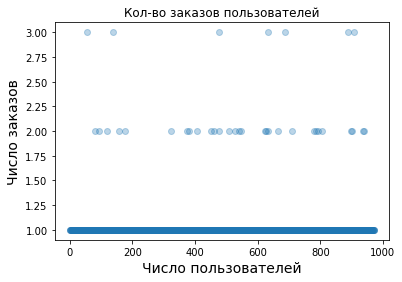

In [139]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'],alpha=0.3)
plt.title("Кол-во заказов пользователей")
plt.xlabel('Число пользователей', fontsize=14)
plt.ylabel('Число заказов', fontsize=14)

Пользователей заказавших больше 2-х заказов уже  мало. Заказы боее 4 можно отнести к аномальным.

<strong>7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.</strong>

In [140]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% Пользователей совершали  больше чем 2 заказа и не более 1% пользователей совершали больше чем 4 заказа.

<strong>8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.</strong>

Text(0, 0.5, 'Стоимость заказа')

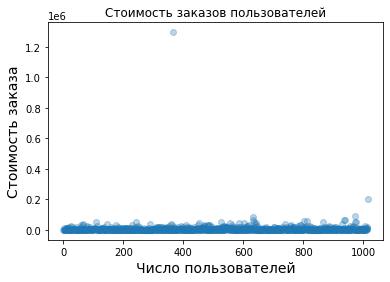

In [141]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'],alpha=0.3)
plt.title("Стоимость заказов пользователей")
plt.xlabel('Число пользователей', fontsize=14)
plt.ylabel('Стоимость заказа', fontsize=14)

Уберем из выборки аномальные значениия и посмотрим на график еще раз.

Text(0, 0.5, 'Стоимость заказа')

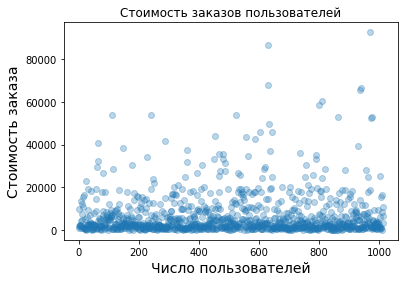

In [142]:
x_values = pd.Series(range(0, len(orders.query('revenue < 200000')['revenue'])))

plt.scatter(x_values, orders.query('revenue < 200000')['revenue'],alpha=0.3)
plt.title("Стоимость заказов пользователей")
plt.xlabel('Число пользователей', fontsize=14)
plt.ylabel('Стоимость заказа', fontsize=14)

Большая часть пользователей платят за заказ до 50 000 у.е После, заказы можно отнести к аномальным. Чтобы точно понять, где мы можем обрезать аномальные значения, обратимся к процентилями ниже:

<strong>9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</strong>

In [143]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не болеее чем у 5% пользователей чек дороже 28 000 у.е. И не больше чем у  1% чек дороже 58 233 у.е

<strong>10 Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.</strong>

In [144]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [145]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


Для начала соберем общую таблицу с кумулятивными значениями.

In [146]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [147]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [148]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


In [149]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [150]:
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [151]:
df.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [152]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Создадим переменные sampleA и sampleB, в которых будет кол-во заказов пользователей с разных групп.

In [153]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Из-за присутсвия выбросов в выборке целесообразно для проверки стат. значимости применить «U-критерий Манна-Уитни».
Сформулируем нулевую и альтернативную гипотезу:

<b>H0:</b> Срднее кол-во заказов из группы 'А' = среднему кол-ву заказов из группы 'B'.

<b>H1:</b> Срднее кол-во заказов из группы 'А' ≠  среднему кол-ву заказов из группы 'B'.

In [154]:
print('alpha = 0.05')
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост заказов: {0:.3f}".format((df['ordersPerDateB'].sum()/df['visitorsPerDateB'].sum())/(df['ordersPerDateA'].sum()/df['visitorsPerDateA'].sum())-1))

alpha = 0.05
p-value: 0.01102
Относительный прирост заказов: 0.160


Анализ показал, что в среднем кол-ве заказов между группой 'А' и группой 'B' есть статистические значимые различия. Значение p-value меньше допустимого порога alpha. Это значит, что мы отвергаем нулевую гипотезу. 
Относительный прирост стреднего от группы 'B' к группе 'А' равен 16 %

<strong>11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.</strong>

Так как данные уже готовы, нам остается сформулировать гипотезы и проверить их.

<b>H0:</b> Средний чек у пользователей из группы 'А' = среднему чеку пользователей из группы 'B'.

<b>H1:</b> Средний чек у пользователей из группы 'А' ≠  среднему чеку пользователей из группы 'B'.

In [155]:
print('alpha = 0.05')
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value: 0.829
Относительный прирост среднего чека: 0.287


p-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Относительный прирост среднего чека между сегментами равен 28,7%

<strong>12 Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.</strong>

Ранее мы приняли решение о аномалиях в которых у пользователей:
<ul>
    <li>Стоимость заказа выше - 58 233.2 у.е </li>
    <li>Кол-во заказа у одного пользователя выше - 4 </li>
</ul>
Это аномальные зачения которые могут повлиять на резултататы тестирования, поэтому мы избавимся от них.

In [156]:
#объявим процентили как переменные
percentile_revenue = int(np.percentile(orders['revenue'], [99]))
percentile_orders = int(np.percentile(ordersByUsers['orders'], [99]))

In [157]:
print(percentile_revenue)
print(percentile_orders)

53904
2


In [163]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [169]:
usersWithManyOrders

58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
33      249864742
347    2742574263
Name: visitorId, dtype: int64

Отфильтруем выборки без данных ID пользователей (аномальных)

In [170]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<b>H0:</b> Срднее кол-во заказов из группы 'А' = среднему кол-ву заказов из группы 'B' (После фильтрации от аномалий).

<b>H1:</b> Срднее кол-во заказов из группы 'А' ≠  среднему кол-ву заказов из группы 'B' (После фильтрации от аномалий).

In [171]:
print('alpha = 0.05')
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост заказов: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value: 0.00702
Относительный прирост заказов: 0.189


После фильтрации относительный прирос сегмента'B' к сегменту 'А' вырос с 16% до 19%. P-value меньше порогового значения alpha, а это значит, что у выборок есть статистически значимые различия и мы отвергаем нулевую гипотезу.

<strong>13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.</strong>

Мы уже офильтровали пользователей, которые имеют отношение к аномалиям в данных. Поэтому сформулируем гипотезы и проведем тестирование.

<b>H0:</b> Средний чек у пользователей из группы 'А' = среднему чеку пользователей из группы 'B' (После фильтрации от аномалий).

<b>H1:</b> Средний чек у пользователей из группы 'А' ≠  среднему чеку пользователей из группы 'B'  (После фильтрации от аномалий).

In [167]:
print('alpha = 0.05')
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value: 0.788
Относительный прирост среднего чека: -0.032


P-value больше 0.05. Поэтому нам не удалось отвергнуть нулевую гипотезу, это значит что в среднем чеке нет различий. Также относитльный прирост среднего чека группы 'В' ниже среднего чека группы 'A' на 3 %. Стоит также отметить, что до фильтрации аномальных заказов, сегмент 'В' превосходил 'A' на 28%. Таким образом, нам удалось провести тестирование в равных условиях.

<strong>14 Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.</strong>

<b>Для начала чтоит подвести небольшие итоги по тестированию. В нашем исследовании мы выяснили, что:</b>
<ul>
<li>Относительный прирост стреднего числа заказов от группы 'B' к группе 'А' равен <b>16 %</b>  (Сырые данные)</li>

<li>Относительный прирост среднего чека от группы 'B' к группе 'А' равен <b>28% </b>(Сырые данные)</li>
<p></p>
    
<li>Относительный прирост стреднего числа заказов от группы 'B' к группе 'А' равен <b>19 %</b>  (Отфильтрованные данные)</li>

<li>Относительный прирост среднего чека от группы 'B' к группе 'А' равен <b> -3% </b>(Отфильтрованные данные)</li>    
    
</ul>

Тестирование с сырыми и отфильтрованными данными среднего числа заказов подтвердили, что у выборок есть статистически значимые различия в пользу группы 'B'. Это позволет сделать вывод о том, что в тестировании по чилу заказов победил сегмент 'B'.
<p></p>
Тестирование с сырыми и отфильтрованными данными среднего чека заказов подтвердили, что у выборок нет статистически значимых различий. Но при тестировании сырых данных сегмент 'B' опередил  сегмент 'А' на 28%, а уже после филтрации аномальных значений,'B' стал меньше  'А' на 3%.
<p></p>
<p></p>
<strong>Заключитлельный вывод: </strong>  Остановить тест. Зафиксировать победу в пользу сегмент 'B' по числу заказов.

<h1>Общий вывод</h1>

<b> Наиболее приоритетные гипотезы по рассчетам ICE:</b>
    <ul>
    <li>8 -я</li>
    <li>0 -я</li>
    <li>7 -я</li>
    </ul>
<b> Наиболее приоритетные гипотезы по рассчетам RICE:</b>
    <ul>
    <li>7 -я</li>
    <li>0 -я</li>
    <li>2 -я</li>
    </ul>
<b> Наименее приоритетная гипотеза по рассчетам RICE и ICE:</b>
    <ul>
    <li>4 -я</li>
    </ul>
<b>Для начала чтоит подвести небольшие итоги по тестированию. В нашем исследовании мы выяснили, что:</b>
<ul>
<li>Относительный прирост стреднего числа заказов от группы 'B' к группе 'А' равен <b>16 %</b>  (Сырые данные)</li>

<li>Относительный прирост среднего чека от группы 'B' к группе 'А' равен <b>28% </b>(Сырые данные)</li>
<p></p>
    
<li>Относительный прирост стреднего числа заказов от группы 'B' к группе 'А' равен <b>19 %</b>  (Отфильтрованные данные)</li>

<li>Относительный прирост среднего чека от группы 'B' к группе 'А' равен <b> -3% </b>(Отфильтрованные данные)</li>    
    
</ul>

Тестирование с сырыми и отфильтрованными данными среднего числа заказов подтвердили, что у выборок есть статистически значимые различия в пользу группы 'B'. Это позволет сделать вывод о том, что в тестировании по чилу заказов победил сегмент 'B'.
<p></p>
Тестирование с сырыми и отфильтрованными данными среднего чека заказов подтвердили, что у выборок нет статистически значимых различий. Но при тестировании сырых данных сегмент 'B' опередил  сегмент 'А' на 28%, а уже после филтрации аномальных значений,'B' стал меньше  'А' на 3%.
<p></p>
<p></p>

<strong>Отчет о проделаных шагах:</strong>
<ul>
<li>1. Датасет изначально был оценен на наличие: Дубликатов, формата значений. </li>
<li>2. Пропуски значений и дубликатов в датасете не было </li>
<li>3. Формат значений был изменен со строчных на дату.</li>
<li>4. Датасеты были объеденены в один для удобства работы с ним</li>
<li>5. Были выявлены наиболее приоритетные гипотезы с помощью фреймворков ICE и RICE.</li>
<li>6. Был построен график кумулятивной выручки для групп 'А' и 'B'</li>
<li>7. Сравнили кумулятивные средние значения по закзаам и выручке среди групп.</li>
<li>8. Посчитали процентили и выявили аномальные значения.</li>
<li>9. Провели тестирование двух групп и рассчет статистической значимости, приянто решение по поводу тестирования</li>
<li>10. На основе всех наблюдений был составлен общий вывод.</li>
</ul>